In [63]:
#得到标签字典
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

dict = unpickle('dataset/cifar-100-python/meta')
# print(dict)

label_list = dict['fine_label_names']
# print(len(label_list))
# print(label_list)

标签:couch


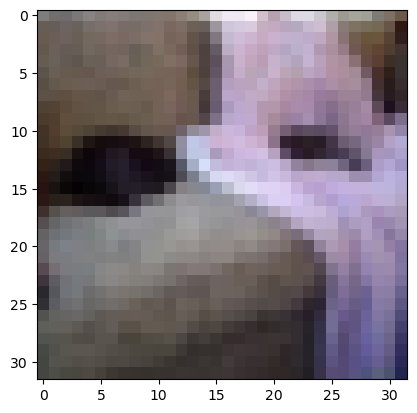

In [64]:
#取第一个图片显示一下
import dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

images = None
labels = None

for batch in dataset.train_loader:
    images, labels = batch
    break

label = labels[0]
image = images[0]

print("标签:" + str(label_list[label]))

#反归一化
mean = (0.5071, 0.4867, 0.4408)
std = (0.2675, 0.2565, 0.2761)

dmean = [-mean/std for mean, std in zip(mean, std)]
dstd = [1/std for std in std]

image = transforms.Normalize(dmean, dstd)(image)
image = transforms.ToPILImage(mode="RGB")(image)

plt.imshow(image)

# 测试tqdm
from tqdm import tqdm

for i in tqdm(range(5)):
    for j in tqdm(range(5)):
        print(i," ",j)